## Prediction of Telecom Churn, 
### A Case Study

### The objective of this study is to predict the churn in the last mounth using four months consequtive data (i.e.churn in  the ninth month)  using the data from the first three months.

####    Here we are using data available from the 'link source'. The downloaded '.csv ' file received is loaded as DataFrame , verified, columns with no information  with high missing values, all entries are null or high percentage of null are dropped, but important columns related to recharge and usage missing values are treated carefully. Some new columns are created with existing columns. Then few of those existing columns are also dropped. By this way we prepare the data. After completion of data preparation we shall complete Data Standardization/Normalization, Split Data into Train & Test and predict churn using   RFE & LOGISTIC REGRESSION , PCA with LOGISTIC REGRESSION, LASSO & DECISSION TREE and LASSO & RANDOM FOREST models.  Details of said procedure ares given below: 

## Importing libraries

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scikitplot.metrics as skmt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings

# Set display options for pandas
pd.set_option('display.max_columns', 500)

# Set up matplotlib for inline plotting
%matplotlib inline

# Ignore warnings
warnings.filterwarnings('ignore')



## Reading the dataset

In [121]:
# Set display format for floating-point numbers
pd.options.display.float_format = '{:.2f}'.format

# Load CSV data file into a DataFrame
df = pd.read_csv('telecom_churn_data.csv', low_memory=False)



In [122]:
df.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,Na

In [123]:
print('Dataframe Shape: ', df.shape)

Dataframe Shape:  (99999, 226)


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


##### df.info() did not display details information of individual columns so to firnd missing values and other information let us find % of missing values of different  columns

In [125]:
# Calculate total number of missing values in each column
total_missing_values = df.isnull().sum()

# Calculate percentage of missing values in each column
missing_percentage = round(100 * (total_missing_values / len(df.index)), 2)

# Display the result
missing_percentage


mobile_number    0.00
circle_id        0.00
loc_og_t2o_mou   1.02
std_og_t2o_mou   1.02
loc_ic_t2o_mou   1.02
                 ... 
aon              0.00
aug_vbc_3g       0.00
jul_vbc_3g       0.00
jun_vbc_3g       0.00
sep_vbc_3g       0.00
Length: 226, dtype: float64

In [126]:
tnl=df.isnull().sum()
col_ms=round(100*(tnl/len(df.index)), 2)
col_ms

mobile_number    0.00
circle_id        0.00
loc_og_t2o_mou   1.02
std_og_t2o_mou   1.02
loc_ic_t2o_mou   1.02
                 ... 
aon              0.00
aug_vbc_3g       0.00
jul_vbc_3g       0.00
jun_vbc_3g       0.00
sep_vbc_3g       0.00
Length: 226, dtype: float64

In [127]:
# Filter columns with missing values percentage greater than or equal to 50%
col_ms[col_ms >= 50]


date_of_last_rech_data_6   74.85
date_of_last_rech_data_7   74.43
date_of_last_rech_data_8   73.66
date_of_last_rech_data_9   74.08
total_rech_data_6          74.85
total_rech_data_7          74.43
total_rech_data_8          73.66
total_rech_data_9          74.08
max_rech_data_6            74.85
max_rech_data_7            74.43
max_rech_data_8            73.66
max_rech_data_9            74.08
count_rech_2g_6            74.85
count_rech_2g_7            74.43
count_rech_2g_8            73.66
count_rech_2g_9            74.08
count_rech_3g_6            74.85
count_rech_3g_7            74.43
count_rech_3g_8            73.66
count_rech_3g_9            74.08
av_rech_amt_data_6         74.85
av_rech_amt_data_7         74.43
av_rech_amt_data_8         73.66
av_rech_amt_data_9         74.08
arpu_3g_6                  74.85
arpu_3g_7                  74.43
arpu_3g_8                  73.66
arpu_3g_9                  74.08
arpu_2g_6                  74.85
arpu_2g_7                  74.43
arpu_2g_8 


##### from missing value % we get a number of  colums which have almost 74% missing values.
Among those last eight colums in above table columns are important so they can not be eleminited and these variables are Categorical Variables also with 0, and 1 values so , missing values can be imputed with '-1' where -1 can be treated as a new category.

These Categorical Variables are:
* night_pck_user_6
* night_pck_user_7
* night_pck_user_8
* night_pck_user_9
* fb_user_6
* fb_user_7
* fb_user_8
* fb_user_9




In [128]:
# List of columns to fill missing values for
ca_vrl = ["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "night_pck_user_9", 
          "fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9"]

# Fill missing values in specified columns with -1
for column in ca_vrl:
    df[column].fillna(value=-1, inplace=True)

    

from these variables dummy variables will be created for categories ended with 6,7,and 8 but categiries ended wit 9 no creation of dummy just now,
after dummy creation all categorial columns will be dropped.


In [129]:
# List of categorical columns
c_vl = ["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "fb_user_6", "fb_user_7", "fb_user_8"]

# Prefixes for dummy columns
ls_c = ['ngt6', 'ngt7', 'ngt8', 'fb6', 'fb7', 'fb8']

# New names for dummy columns
ls_n = ['d1', 'd2', 'd3', 'd4', 'd5', 'd6']

# Iterate through the columns and create dummy variables
for i in range(6):
    prefix = ls_c[i]
    new_name = ls_n[i]
    col_name = c_vl[i]
    dummy_cols = pd.get_dummies(df[col_name], prefix=prefix, drop_first=True)
    df = pd.concat([df, dummy_cols], axis=1)

# Drop original categorical columns
df = df.drop(c_vl, axis=1)


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 232 entries, mobile_number to fb8_1.0
dtypes: bool(12), float64(173), int64(35), object(12)
memory usage: 169.0+ MB


### Missing Value Treatment
From above calculation of missing values it is seen that a large number veriables have missing values.Among those a  considerable number of columns have more than 70% missing values. Castomer data are very much essential for churn determination so treatment of missing values will have tp be done carefully.

We can do missing value treatment in following ways:

a.  Deleting the missing values

b.  Replacing the missing values by another value, commonly the mean, median, mode etc. 

c.  Statistical models such as k-NN, SVM etc.can be used to predict and impute missing values

WE see that following columns are very valuable columns but have very high value of missing data 

total_rech_data_6     $\;\;\;\;\;\;$    74.85%    

av_rech_amt_data_6    $\;\;\;\;\;\;$     74.85 %    

total_rech_data_7       $\;\;\;\;\;\;$   74.43%

av_rech_amt_data_7     $\;\;\;\;\;\;$    74.43%

total_rech_data_8      $\;\;\;\;\;\;$    73.66%      

av_rech_amt_data_8    $\;\;\;\;\;\;$     73.66 %    

total_rech_data_9     $\;\;\;\;\;\;$     74.08%

av_rech_amt_data_9     $\;\;\;\;\;\;$    74.08%

let us see the distribution of these columns

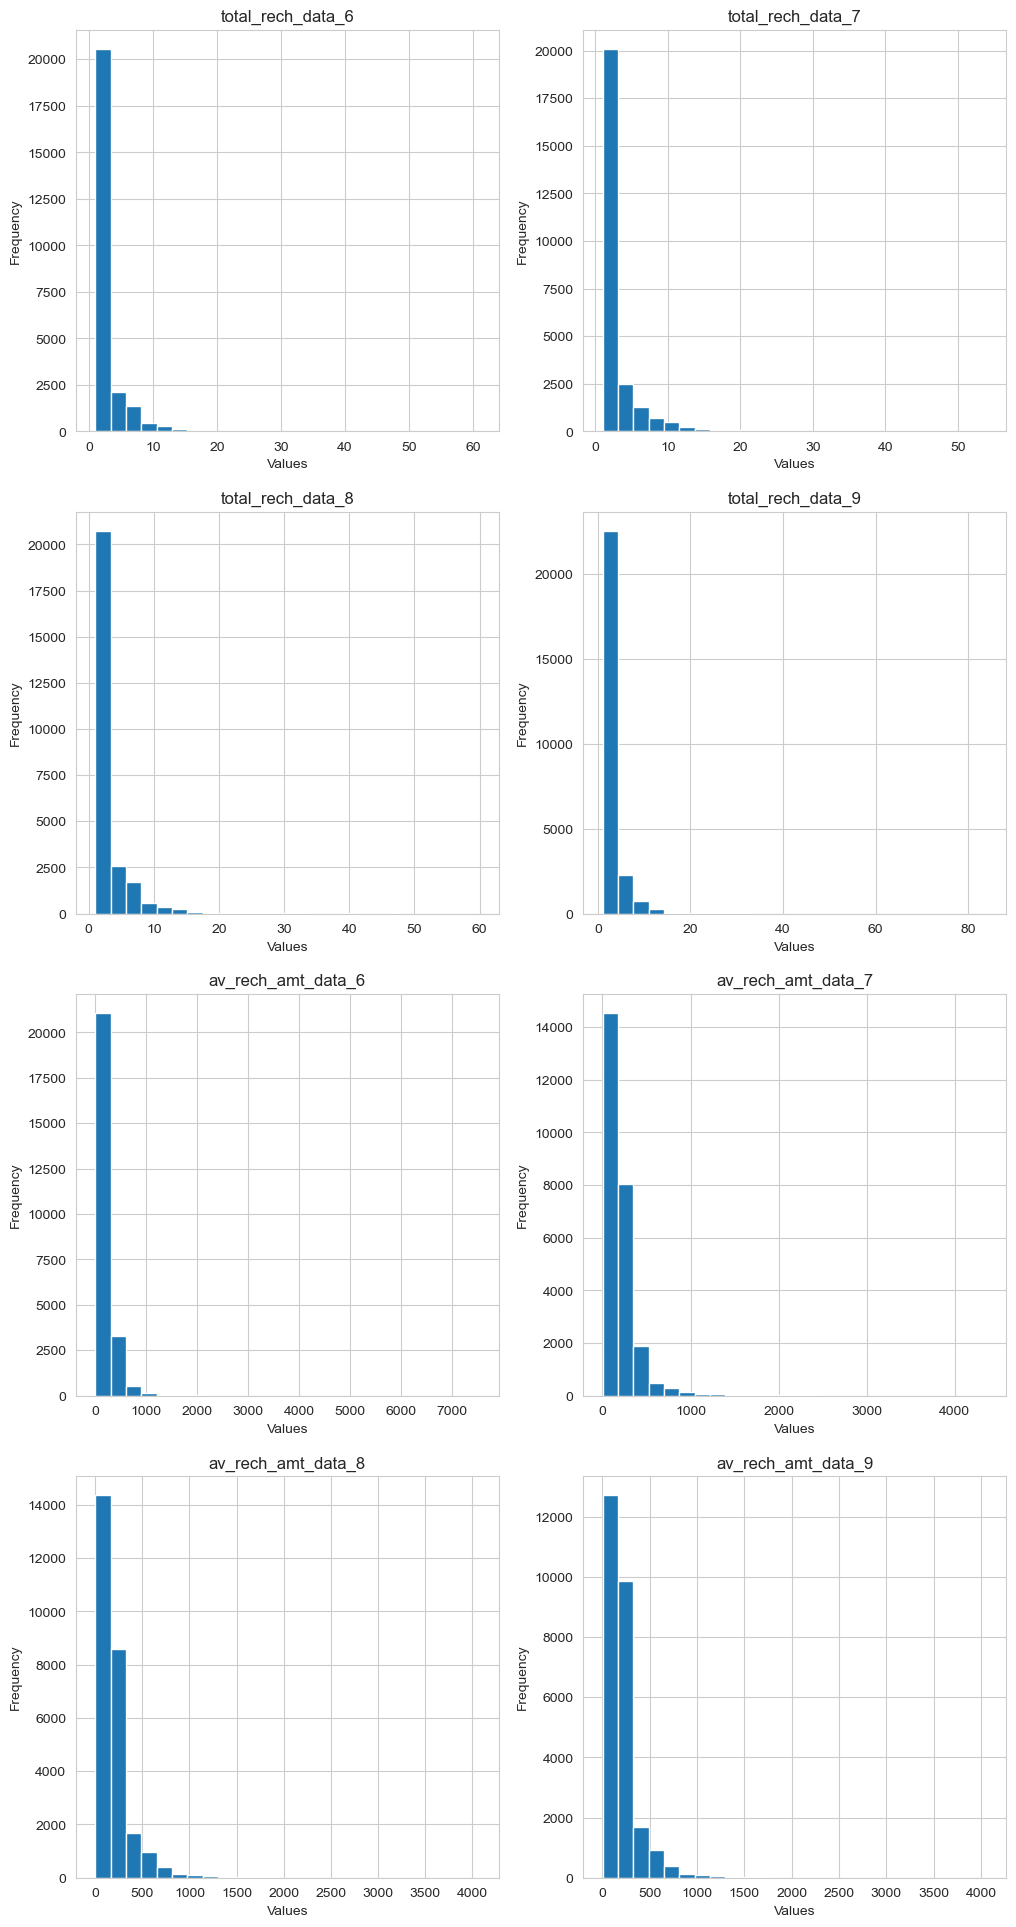

In [131]:
# List of columns for histograms
ls_ra = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 
         'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']

# Create a new figure and adjust layout
plt.figure(figsize=(12, 24))
plt.tight_layout()

# Create histograms for each column
for i, column in enumerate(ls_ra, 1):
    plt.subplot(4, 2, i)
    plt.hist(df[column].dropna(), bins=25)
    plt.title(column)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
plt.show()


##### It is also notable that
for 'date_of_last_rech_data_6' missing percentage is   74.85 same as  'total_rech_data_6' and 'av_rech_amt_data_6'

date_of_last_rech_data_7   ,
date_of_last_rech_data_8   ,
date_of_last_rech_data_9    are also show same relation 
so we may conclude that no recharge was done in the respective month. 

Thus, missing values can be imputed with 0.

In [132]:
# List of columns to fill missing values for
columns_to_fill = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']

# Fill missing values in each column with 0
for column in columns_to_fill:
    df[column].fillna(value=0, inplace=True)


In [133]:
# Columns with more than 70% missing values
tnl=df.isnull().sum()
col_ms=round(100*(tnl/len(df.index)), 2)
col_ms[col_ms >= 70]

date_of_last_rech_data_6   74.85
date_of_last_rech_data_7   74.43
date_of_last_rech_data_8   73.66
date_of_last_rech_data_9   74.08
max_rech_data_6            74.85
max_rech_data_7            74.43
max_rech_data_8            73.66
max_rech_data_9            74.08
count_rech_2g_6            74.85
count_rech_2g_7            74.43
count_rech_2g_8            73.66
count_rech_2g_9            74.08
count_rech_3g_6            74.85
count_rech_3g_7            74.43
count_rech_3g_8            73.66
count_rech_3g_9            74.08
arpu_3g_6                  74.85
arpu_3g_7                  74.43
arpu_3g_8                  73.66
arpu_3g_9                  74.08
arpu_2g_6                  74.85
arpu_2g_7                  74.43
arpu_2g_8                  73.66
arpu_2g_9                  74.08
dtype: float64

In [134]:
# Identify columns with more than 70% missing values
columns_70_percent_missing = col_ms[col_ms >= 70].index

# Drop columns with more than 70% missing values from the DataFrame
df.drop(columns_70_percent_missing, axis=1, inplace=True)


In [135]:
df.shape

(99999, 208)

We can drop four more collumns by deriving new columns by multiplying 'total_rech_data..' and av_rech_amt_data..' 
to a new column 'total_rech_data_amt..' and then eleminiting 'total_rech_data..' and 'av_rech_amt_data..' columns

In [136]:
# List of columns to multiply
ls_dr = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 
         'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']

# List of new columns to store the multiplication result
ls_nu = ['total_rech_data_amt_6', 'total_rech_data_amt_7', 'total_rech_data_amt_8', 'total_rech_data_amt_9']

# Multiply corresponding pairs of columns and store the result in new columns
for i in range(4):
    j = i + 4  # Index to access the second column for multiplication
    df[ls_nu[i]] = df[ls_dr[i]] * df[ls_dr[j]]

# Drop the original columns from ls_dr
df.drop(ls_dr, axis=1, inplace=True)


In [137]:
df.shape

(99999, 204)



we can filter High-Value Customers by adding recharge amount and recharge data amount for first three months (6,7 & 8th month)
and averaging it:

##### *   The  ‘good’ phase' months ie the first two months are used to get average recharge amount to find high value castomers who have higher recharge amount (more than 70 percentile).


In [138]:
# Calculate average recharge amount for the first two months
avgreg_amount = (df["total_rech_amt_6"] + df["total_rech_data_amt_6"] + 
                 df["total_rech_amt_7"] + df["total_rech_data_amt_7"]) / 2

# Calculate the 70th percentile of the average recharge amount
amont_70 = np.percentile(avgreg_amount, 70.0)
print('70th percentile of first two months average recharge amount:', round(amont_70, 2))

# Filter the DataFrame based on the 70th percentile
df = df[avgreg_amount >= amont_70]

# Print the shape of the filtered DataFrame
print('Dataframe Shape:', df.shape)


70th percentile of first two months average recharge amount: 478.0
Dataframe Shape: (30001, 204)


#### Identify Curn & Tag Churners


In [139]:
# Calculate the sum of various usage-based features for the ninth month
X = df["total_ic_mou_9"] + df["total_og_mou_9"] + df["vol_2g_mb_9"] + df["vol_3g_mb_9"]

# Assign churn labels based on whether the sum is zero or not
# If the sum is zero, the customer is labeled as churned (1); otherwise, not churned (0)
df["churn"] = np.where(X == 0, 1, 0)


##### Removeing all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [140]:
# Identify columns to be dropped: all columns ending with "_9"
drop_9_columns = [idx for idx in list(df) if idx.endswith("_9")]

# Add "sep_vbc_3g" to the list of columns to be dropped
drop_9_columns += ["sep_vbc_3g"]

# Drop identified columns from the DataFrame
df.drop(drop_9_columns, axis=1, inplace=True)

# Print the shape of the DataFrame after dropping columns
print('Dataframe Shape:', df.shape)


Dataframe Shape: (30001, 157)


In [141]:
# Drop columns with all values being null
df.dropna(axis=1, how='all', inplace=True)

# Identify columns that have no variance
unique_count = df.nunique().sort_values(ascending=False)
print("Dataframe Unique Values: \n", unique_count)



Dataframe Unique Values: 
 mobile_number           30001
arpu_7                  29084
arpu_6                  29072
arpu_8                  28073
total_og_mou_7          23684
                        ...  
last_date_of_month_7        1
last_date_of_month_6        1
std_og_t2c_mou_6            1
std_og_t2c_mou_7            1
std_og_t2c_mou_8            1
Length: 157, dtype: int64


### Identify columns that have no varience & Drop

In [142]:
# Identify columns with zero variance (all same entries)
unique_count = df.nunique()
unique_one = unique_count[unique_count == 1].index

# Convert the index of columns with zero variance to a list for dropping
drop_lst = list(unique_one)

# Drop columns with zero variance
df.drop(drop_lst, axis=1, inplace=True)


In [143]:
df.shape

(30001, 144)

In [144]:
df.head(5)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,ngt6_0.0,ngt6_1.0,ngt7_0.0,ngt7_1.0,ngt8_0.0,ngt8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn
0,7000842753,197.38,214.82,213.80,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,True,False,True,False,True,False,False,True,False,True,False,True,252.00,252.00,252.00,1
7,7000701601,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,False,False,False,False,False,False,False,False,False,False,False,False,0.00,0.00,0.00,1
8,7001524846,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.0

#### Missing value treatment in rows:

In [145]:
# Calculate the sum of missing values in each row
missing_row_data = df.isnull().sum(axis=1)

# Filter rows with more than 0 missing values
rows_with_missing_values = missing_row_data[missing_row_data > 0]


In [146]:
# small percentage of rows has more than or equal to 27 missing values so droping of those rows will not effect much
d_rows = df.isnull().sum(axis=1) >= 27
# drop rows with missing values greater >= 27
df = df[df.isnull().sum(axis=1) < 27]
df.shape


(28504, 144)

In [147]:
# Calculate the number of rows with at least 27 missing values
num_rows_with_missing_27 = d_rows.sum()

# Calculate the percentage of rows with at least 27 missing values
percent_rows_with_missing_27 = (num_rows_with_missing_27 / df.shape[0]) * 100

# Print the results
print("Number of rows with >= 27 missing values = {}".format(num_rows_with_missing_27))
print("     % of rows with >= 27 missing values = {} %".format(percent_rows_with_missing_27))


Number of rows with >= 27 missing values = 1497
     % of rows with >= 27 missing values = 5.251894470951445 %


In [148]:
# Calculate the sum of missing values in each row
rows_missing_data = df.isnull().sum(axis=1)

# Print rows with missing values (sum greater than 0)
print(rows_missing_data[rows_missing_data > 0])


91       1
191      1
588      1
603      2
679      1
        ..
98971    1
99224    2
99313    1
99515    1
99672    1
Length: 341, dtype: int64


a very small number of rows have one or two missing data

In [149]:
# Calculate the percentage of missing values for each column
column_summary = round(100 * (df.isnull().sum() / len(df.index)), 2)

# Print columns with missing values (percentage greater than 0)
print(column_summary[column_summary > 0])


date_of_last_rech_6   0.12
date_of_last_rech_7   0.18
date_of_last_rech_8   0.97
dtype: float64


Here we see that the remaining missing values are in date columns, those may be converted into appropreate values for analysis.

In [150]:
# List of date columns to be converted
date_vars = ["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"]

# Convert date columns to datetime format
df[date_vars] = df[date_vars].apply(pd.to_datetime)

# Display the first few rows of the converted date columns
print(df[date_vars].head())

   date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8
7           2014-06-27          2014-07-25          2014-08-26
8           2014-06-25          2014-07-31          2014-08-30
21          2014-06-30          2014-07-31          2014-08-31
23          2014-06-18          2014-07-07          2014-08-24
33          2014-06-30          2014-07-30          2014-08-26


In [151]:
# Iterate over each date column in date_vars and convert to datetime format
for column in date_vars:
    df[column] = pd.to_datetime(df[column], format='%m/%d/%Y')

# Print information about the converted columns
print(df[date_vars].info())

# Display the first few rows of the converted date columns
print(df[date_vars].head())


<class 'pandas.core.frame.DataFrame'>
Index: 28504 entries, 7 to 99997
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_of_last_rech_6  28471 non-null  datetime64[ns]
 1   date_of_last_rech_7  28452 non-null  datetime64[ns]
 2   date_of_last_rech_8  28228 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 890.8 KB
None
   date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8
7           2014-06-27          2014-07-25          2014-08-26
8           2014-06-25          2014-07-31          2014-08-30
21          2014-06-30          2014-07-31          2014-08-31
23          2014-06-18          2014-07-07          2014-08-24
33          2014-06-30          2014-07-30          2014-08-26


In [33]:
# Convert end of June, July, and August 2014 to datetime objects
lmonth_6 = pd.to_datetime('6/30/2014', format='%m/%d/%Y')
lmonth_7 = pd.to_datetime('7/31/2014', format='%m/%d/%Y')
lmonth_8 = pd.to_datetime('8/31/2014', format='%m/%d/%Y')


In [153]:
# Convert date columns to datetime objects
df['date_of_last_rech_6'] = pd.to_datetime(df['date_of_last_rech_6'])
df['date_of_last_rech_7'] = pd.to_datetime(df['date_of_last_rech_7'])
df['date_of_last_rech_8'] = pd.to_datetime(df['date_of_last_rech_8'])

# Define datetime objects representing the end of months June, July, and August 2014
lmonth_6 = pd.to_datetime('2014-06-30')
lmonth_7 = pd.to_datetime('2014-07-31')
lmonth_8 = pd.to_datetime('2014-08-31')

# Calculate the number of days left until the end of each month from the last recharge date
df["rech_days_left_6"] = (lmonth_6 - df["date_of_last_rech_6"]).dt.days
df["rech_days_left_7"] = (lmonth_7 - df["date_of_last_rech_7"]).dt.days
df["rech_days_left_8"] = (lmonth_8 - df["date_of_last_rech_8"]).dt.days


In [154]:
# Add date columns to the list of columns to drop
drop_columns = date_vars

# Drop all old date columns from the DataFrame
df.drop(drop_columns, axis=1, inplace=True)

# Create a copy of the modified DataFrame for further processing
dfc = df.copy()


In [36]:
df.shape

(28504, 144)

In [37]:
df[['rech_days_left_6', 'rech_days_left_7', 'rech_days_left_8']].describe()

,rech_days_left_6,rech_days_left_7,rech_days_left_8
count,28471.00,28452.00,28228.00
mean,3.39,3.49,4.15
std,4.49,4.29,5.10
min,0.00,0.00,0.00
25%,0.00,0.00,1.00
50%,2.00,2.00,3.00
75%,4.00,5.00,6.00
max,29.00,30.00,30.00


The columns 'rech_days_left_6', 'rech_days_left_7', and 'rech_days_left_8' indicate the number of days left until the end of the respective months after the last recharge. Here's a concise summary:

- Counts: There are 28,471, 28,452, and 28,228 non-null values for 'rech_days_left_6', 'rech_days_left_7', and 'rech_days_left_8' respectively, indicating data availability.
- Mean Values: On average, customers have approximately 3.39, 3.49, and 4.15 days left until the end of the months after their last recharge.
- Variability: The standard deviations are 4.49, 4.29, and 5.10 respectively, showing variability around the mean.
- Minimum Values: The minimum values are 0 for all columns, suggesting that some customers recharge on the last day of the month.
- Percentiles: The 25th percentile values are 0, 0, and 1 respectively, while the medians are 2, 2, and 3. This indicates the distribution of days left.
- Maximum Values: The maximum values are 29, 30, and 30 respectively, representing cases where customers recharge well in advance.
This summary provides insights into customer behavior regarding recharges near the end of each month.

In [155]:
# Impute missing values with median for recharge days left
df['rech_days_left_6'].fillna(df['rech_days_left_6'].median(), inplace=True)
df['rech_days_left_7'].fillna(df['rech_days_left_7'].median(), inplace=True)
df['rech_days_left_8'].fillna(df['rech_days_left_8'].median(), inplace=True)



In [156]:
df.shape

(28504, 144)

In [158]:
# Calculate the sum of missing values in each row
rows_missing_data = df.isnull().sum(axis=1)

# Print rows with missing values (sum greater than 0)
print(rows_missing_data[rows_missing_data > 0])


Series([], dtype: int64)


In [41]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn,rech_days_left_6,rech_days_left_7,rech_days_left_8
count,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00
mean,7001213864.75,560.38,570.63,526.06,265.25,275.93,244.73,379.89,389.85,350.23,16.27,12.92,13.03,26.83,20.53,20.75,87.10,89.17,81.99,167.77,169.07,159.16,6.55,6.66,6.16,1.60,1.92,1.78,261.43,264.91,247.32,167.66,178.72,154.81,180.72,192.97,163.99,1.84,1.88,1.66,350.22,373.57,320.45,2.01,2.06,1.97,5.88,7.28,6.84,0.67,0.04,0.06,620.22,647.88,576.65,67.13,69.19,65.74,154.33,157.32,153.46,15.75,16.67,15.11,237.23,243.19,234.33,15.07,15.89,14.53,29.76,31.88,29.23,2.76,2.90,2.68,47.59,50.68,46.44,296.82,307.51,293.43,0.06,0.02,0.03,10.76,12.06,11.35,1.17,1.55,1.28,11.97,11.96,10.33,663.43,672.15,604.78,167.78,171.25,163.32,99.49,100.73,94.22,127.07,127.01,108.77,326.22,359.09,345.59,0.18,0.19,0.16,1.06,1.23,1.09,0.21,0.22,0.21,0.21,0.23,0.21,1234.06,172.28,179.72,157.07,444.79,527.56,469.51,0.06,3.39,3.48,4.14
std,687776.04,448.96,480.08,500.75,458.72,482.67,464.02,479.25,502.60

Insights from the dataset:

**Mobile Number Distribution:**
   - The dataset contains information related to 28,504 mobile numbers.

**Usage Patterns:**
   - ARPU (Average Revenue Per User) decreases slightly from month 7 to month 8.
   - Minutes of usage for on-net and off-net calls show a slight decrease from month 6 to month 8.
   - Roaming minutes of usage appear to be relatively low across all months.
   - Local, STD, and ISD call volumes vary across months.
   - Total recharge amount and frequency vary across months.
   - Data usage in terms of 2G and 3G consumption varies across months.
   
**Outlier Treatment:** 
   - Most of the  revenue data show outliers but the model will be built  on usage of voice and data.So treatment these outliers is not necessary.

**Churn Rate:**
   - The 'churn' column might indicate whether a customer has churned or not.

**Recharge Patterns:**
   - Total recharge amount decreases slightly from month 6 to month 8.
   - Max recharge amount and last day recharge amount vary across months.

**Network Usage:**
   - Volume of 2G and 3G data consumption varies across months.
   - Monthly and sachet packs usage for 2G and 3G services could be observed.

**Other Insights:**
   - Columns related to the age of the customer's account ('aon'), 3G usage, and VBC for 3G services are present.
 



In [42]:
# Coping treated file df:
tel_com=df.copy()

## EXPLORATORY DATA ANALYSIS :

In [159]:
# Checking data imbalance:
churn = df["churn"].value_counts()
churn_rate = churn[1] / (churn[1] + churn[0])

print("Total Churn Count     = ", churn[1])
print("Total Not-Churn Count = ", churn[0])
print("Churn Rate            = {:.2f}%".format(churn_rate * 100))



Total Churn Count     =  1596
Total Not-Churn Count =  26908
Churn Rate            = 5.60%


- Data is highly imbalanced, we need to balance it before creating the model


#### Analysis on 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8'

In [160]:
# Splitting the dataset into churn and non-churn groups for further analysis and processing
nchurn_df = df[df["churn"] == 0]  # DataFrame containing non-churn instances
churn_df  = df[df["churn"] == 1]  # DataFrame containing churn instances


In [161]:
# Calculation of mean and median for "total_rech_num_6" variable for churn and non-churn instances
mean_ncharn = np.mean(nchurn_df["total_rech_num_6"])  # Mean for non-churn instances
mean_charn = np.mean(churn_df["total_rech_num_6"])    # Mean for churn instances
median_ncharn = np.median(nchurn_df["total_rech_num_6"])  # Median for non-churn instances
median_charn = np.median(churn_df["total_rech_num_6"])    # Median for churn instances

# Printing mean and median values
print(' Mean not_churn:-', mean_ncharn, '\n', 'Mean churn:-', mean_charn)
print(' Median not_churn:-', median_ncharn, '\n', 'Median churn:-', median_charn)

# Printing quantiles
print(" Quantiles:")
print(np.percentile(nchurn_df["total_rech_num_6"], np.arange(0, 100, 25)))
print(np.percentile(churn_df["total_rech_num_6"], np.arange(0, 100, 25)))


 Mean not_churn:- 11.826036866359447 
 Mean churn:- 14.31704260651629
 Median not_churn:- 9.0 
 Median churn:- 12.0
 Quantiles:
[ 0.  6.  9. 14.]
[ 0.  8. 12. 18.]


#### Observation:
The observations regarding the "total_rech_num_6" variable for churn and non-churn instances are as follows:

- The mean value of "total_rech_num_6" for churn instances (14.32) is higher than that for non-churn instances (11.83), indicating that, on average, churned customers tend to recharge more frequently than non-churned customers.
- Similarly, the median value of "total_rech_num_6" for churn instances (12.0) is higher than that for non-churn instances (9.0), suggesting that even at the middle value, churned customers tend to have higher recharge counts.
- The quantile analysis shows that across different percentiles, churned customers generally have higher recharge counts compared to non-churned customers. For example, at the 75th percentile, churned customers have a recharge count of 18 compared to 14 for non-churned customers. This further supports the observation that churned customers tend to recharge more frequently.


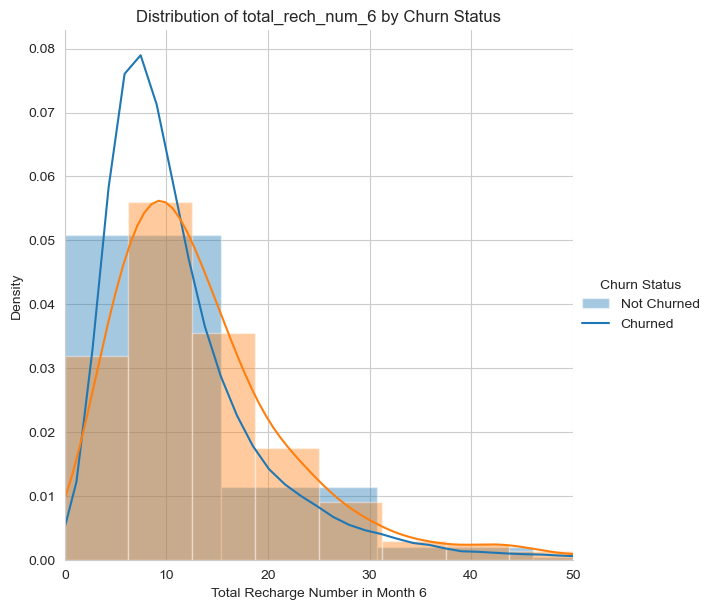

In [46]:
sns.set_style('whitegrid')

# Creating the FacetGrid
g = sns.FacetGrid(df, hue='churn', height=6)

# Mapping the distplot onto the FacetGrid
g.map(sns.distplot, "total_rech_num_6", bins=20)  # Adjusting bins for better visualization

# Adding a title
plt.title('Distribution of total_rech_num_6 by Churn Status')

# Adding labels
plt.xlabel('Total Recharge Number in Month 6')
plt.ylabel('Density')

# Adding a legend with custom labels
g.add_legend(title='Churn Status', labels=['Not Churned', 'Churned'])

# Setting x-axis limits
plt.xlim(0, 50)

# Show plot
plt.show()

In [162]:
# Calculating mean and finding median for "total_rech_num_7" for churn or non-churn instances:
mean_ncharn = np.mean(nchurn_df["total_rech_num_7"])
mean_charn = np.mean(churn_df["total_rech_num_7"])
median_ncharn = np.median(nchurn_df["total_rech_num_7"])
median_charn = np.median(churn_df["total_rech_num_7"])

# Printing mean and median values along with quantiles:
print('Mean not_churn: ', mean_ncharn, '\nMean churn: ', mean_charn)
print('Median not_churn: ', median_ncharn, '\nMedian churn: ', median_charn)
print("Quantiles:")
print(np.percentile(nchurn_df["total_rech_num_7"], np.arange(0, 100, 25)))
print(np.percentile(churn_df["total_rech_num_7"], np.arange(0, 100, 25)))


Mean not_churn:  11.875464545859968 
Mean churn:  13.43170426065163
Median not_churn:  9.0 
Median churn:  10.0
Quantiles:
[ 0.  6.  9. 15.]
[ 0.  7. 10. 17.]


Observations:
- The mean value of "total_rech_num_7" for churn instances (13.43) is higher than that for non-churn instances (11.88), suggesting that, on average, churned customers tend to recharge more frequently than non-churned customers in the seventh month.
- Similarly, the median value of "total_rech_num_7" for churn instances (10.0) is higher than that for non-churn instances (9.0), indicating that even at the middle value, churned customers tend to have higher recharge counts.
- The quantile analysis shows that across different percentiles, churned customers generally have higher recharge counts compared to non-churned customers in the seventh month. For example, at the 75th percentile, churned customers have a recharge count of 17 compared to 15 for non-churned customers. This further supports the observation that churned customers tend to recharge more frequently.

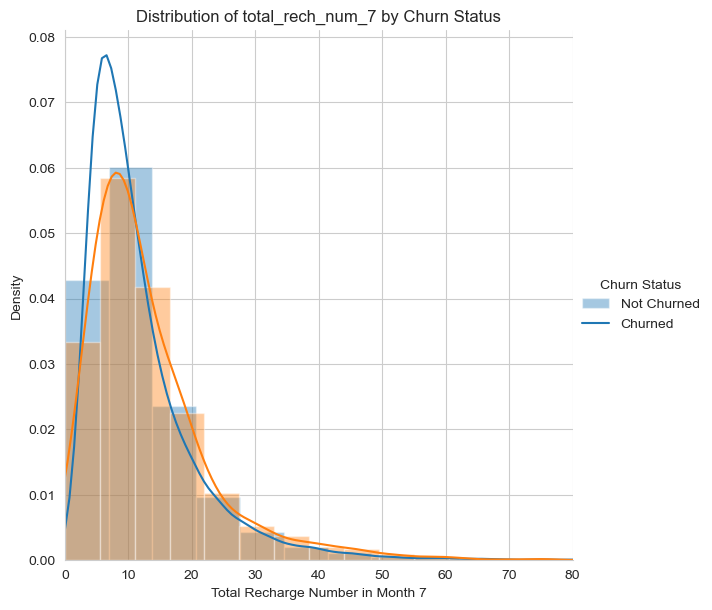

In [48]:
sns.set_style('whitegrid')

# Creating the FacetGrid
g = sns.FacetGrid(df, hue='churn', height=6)

# Mapping the distplot onto the FacetGrid
g.map(sns.distplot, "total_rech_num_7", bins=20)  # Adjusting bins for better visualization

# Adding a title
plt.title('Distribution of total_rech_num_7 by Churn Status')

# Adding labels
plt.xlabel('Total Recharge Number in Month 7')
plt.ylabel('Density')

# Adding a legend with custom labels
g.add_legend(title='Churn Status', labels=['Not Churned', 'Churned'])

# Setting x-axis limits
plt.xlim(0, 80)

# Show plot
plt.show()

In [49]:
#for total_rech_num_8
mean_ncharn=np.mean(nchurn_df ["total_rech_num_8"])
mean_charn =np.mean(churn_df ["total_rech_num_8"])
median_ncharn=np.median(nchurn_df ["total_rech_num_8"])
median_charn =np.median(churn_df ["total_rech_num_8"])
print(' Mean not_charn:-',mean_ncharn,'\n','Mean charn:-',mean_charn)
print(' Median not_charn:-',median_ncharn,'\n','Median charn:-',median_charn,)
print(" Quantiles:")
print(np.percentile(nchurn_df["total_rech_num_8"],np.arange(0,100,25)))
print(np.percentile(churn_df["total_rech_num_8"],np.arange(0,100,25)))

 Mean not_charn:- 10.523561766017542 
 Mean charn:- 7.021303258145363
 Median not_charn:- 8.0 
 Median charn:- 5.0
 Quantiles:
[ 0.  5.  8. 13.]
[0. 3. 5. 9.]


Observations:
- The mean value of "total_rech_num_8" for non-churn instances (10.52) is higher than that for churn instances (7.02), indicating that, on average, non-churned customers tend to recharge more frequently than churned customers in the eighth month.
- Similarly, the median value of "total_rech_num_8" for non-churn instances (8.0) is higher than that for churn instances (5.0), suggesting that even at the middle value, non-churned customers tend to have higher recharge counts.
- The quantile analysis shows that across different percentiles, non-churned customers generally have higher recharge counts compared to churned customers in the eighth month. For example, at the 75th percentile, non-churned customers have a recharge count of 13 compared to 9 for churned customers. This further supports the observation that non-churned customers tend to recharge more frequently.







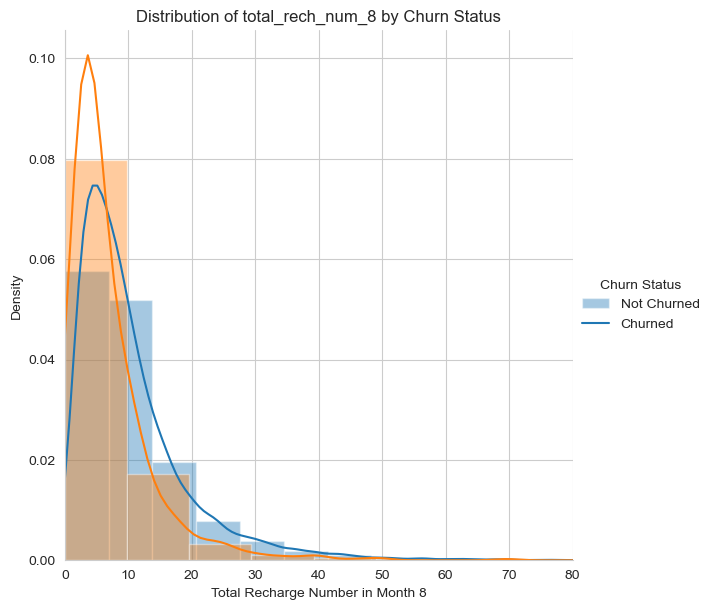

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# df = ...

sns.set_style('whitegrid')

# Creating the FacetGrid
g = sns.FacetGrid(df, hue='churn', height=6)

# Mapping the distplot onto the FacetGrid
g.map(sns.distplot, "total_rech_num_8", bins=20)  # Adjusting bins for better visualization

# Adding a title
plt.title('Distribution of total_rech_num_8 by Churn Status')

# Adding labels
plt.xlabel('Total Recharge Number in Month 8')
plt.ylabel('Density')

# Adding a legend with custom labels
g.add_legend(title='Churn Status', labels=['Not Churned', 'Churned'])

# Setting x-axis limits
plt.xlim(0, 80)

# Show plot
plt.show()


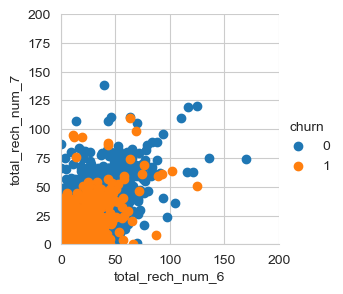

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create FacetGrid and scatter plot
grid = sns.FacetGrid(df, hue='churn')
grid.map(plt.scatter, "total_rech_num_6", "total_rech_num_7").add_legend()

# Adjust axis limits for zooming in
plt.xlim(0, 200)  # Adjust x-axis limits as needed
plt.ylim(0, 200)  # Adjust y-axis limits as needed

plt.show()


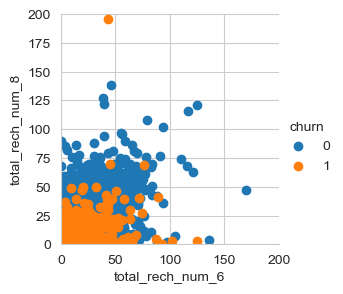

In [52]:
grid = sns.FacetGrid(df, hue='churn')
grid.map(plt.scatter, "total_rech_num_6", "total_rech_num_8").add_legend()

# Adjust axis limits for zooming in
plt.xlim(0, 200)  # Adjust x-axis limits as needed
plt.ylim(0, 200)  # Adjust y-axis limits as needed

plt.show()


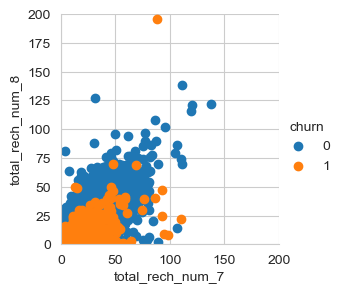

In [53]:
grid = sns.FacetGrid(df, hue='churn')
grid.map(plt.scatter, "total_rech_num_7", "total_rech_num_8").add_legend()

# Adjust axis limits for zooming in
plt.xlim(0, 200)  # Adjust x-axis limits as needed
plt.ylim(0, 200)  # Adjust y-axis limits as needed

plt.show()

#### Analysis on max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8'

In [54]:
#for max_rech_amt_6
mean_ncharn=np.mean(nchurn_df ["max_rech_amt_6"])
mean_charn =np.mean(churn_df ["max_rech_amt_6"])
median_ncharn=np.median(nchurn_df ["max_rech_amt_6"])
median_charn =np.median(churn_df ["max_rech_amt_6"])
print(' Mean not_charn:-',mean_ncharn,'\n','Mean charn:-',mean_charn)
print(' Median not_charn:-',median_ncharn,'\n','Median charn:-',median_charn,)
print(" Quantiles:")
print(np.percentile(nchurn_df["max_rech_amt_6"],np.arange(0,100,25)))
print(np.percentile(churn_df["max_rech_amt_6"],np.arange(0,100,25)))

 Mean not_charn:- 168.3110227441653 
 Mean charn:- 158.79761904761904
 Median not_charn:- 120.0 
 Median charn:- 110.0
 Quantiles:
[  0. 110. 120. 200.]
[  0. 100. 110. 154.]


Observations:
- The mean value of "total_rech_amt_6" for non-churn instances (168.31) is slightly higher than that for churn instances (158.80), indicating that, on average, non-churned customers tend to recharge more amount than churned customers in the sixth month.
- Similarly, the median value of "total_rech_amt_6" for non-churn instances (120.0) is slightly higher than that for churn instances (110.0), suggesting that even at the middle value, non-churned customers tend to recharge higher amounts.
- The quantile analysis shows that across different percentiles, non-churned customers generally have higher recharge amounts compared to churned customers in the sixth month. For example, at the 75th percentile, non-churned customers have a recharge amount of 200 compared to 154 for churned customers. This further supports the observation that non-churned customers tend to recharge more amount.

<Figure size 14000x2000 with 0 Axes>

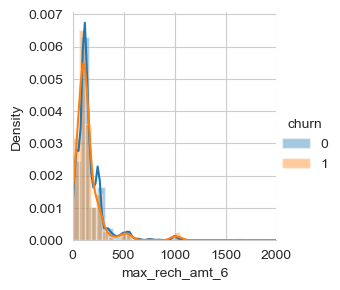

In [55]:
# Set style to whitegrid
sns.set_style('whitegrid')

# Create a bigger figure
plt.figure(figsize=(140, 20))  # Adjust the figure size as needed

# Create FacetGrid and distribution plot
grid = sns.FacetGrid(df, hue='churn')
grid.map(sns.distplot, "max_rech_amt_6").add_legend()

# Adjust axis limits for zooming in
plt.xlim(0, 2000)  # Adjust x-axis limits as needed

plt.show()

In [163]:
#for max_rech_amt_7
mean_ncharn=np.mean(nchurn_df ["max_rech_amt_7"])
mean_charn =np.mean(churn_df ["max_rech_amt_7"])
median_ncharn=np.median(nchurn_df ["max_rech_amt_7"])
median_charn =np.median(churn_df ["max_rech_amt_7"])
print(' Mean not_charn:-',mean_ncharn,'\n','Mean charn:-',mean_charn)
print(' Median not_charn:-',median_ncharn,'\n','Median charn:-',median_charn,)
print(" Quantiles:")
print(np.percentile(nchurn_df["max_rech_amt_7"],np.arange(0,100,25)))
print(np.percentile(churn_df["max_rech_amt_7"],np.arange(0,100,25)))

 Mean not_charn:- 171.94440315147912 
 Mean charn:- 159.51629072681703
 Median not_charn:- 130.0 
 Median charn:- 110.0
 Quantiles:
[  0. 110. 130. 200.]
[  0.  98. 110. 154.]


Observations for the "total_rech_amt_7" variable:

Mean not_churn: 171.94
Mean churn: 159.52
Median not_churn: 130.0
Median churn: 110.0
Quantiles:

[  0. 110. 130. 200.] (Non-churn)
[  0.  98. 110. 154.] (Churn)

Observations:
- The mean value of "total_rech_amt_7" for non-churn instances (171.94) is slightly higher than that for churn instances (159.52), indicating that, on average, non-churned customers tend to recharge more amount than churned customers in the seventh month.
- Similarly, the median value of "total_rech_amt_7" for non-churn instances (130.0) is slightly higher than that for churn instances (110.0), suggesting that even at the middle value, non-churned customers tend to recharge higher amounts.
- The quantile analysis shows that across different percentiles, non-churned customers generally have higher recharge amounts compared to churned customers in the seventh month. For example, at the 75th percentile, non-churned customers have a recharge amount of 200 compared to 154 for churned customers. This further supports the observation that non-churned customers tend to recharge more amount.


<Figure size 1000x600 with 0 Axes>

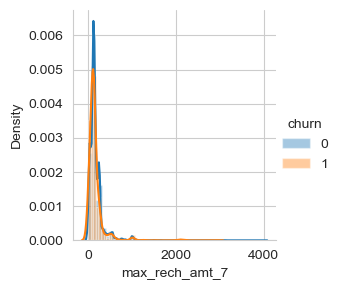

In [57]:
# Set style to whitegrid
sns.set_style('whitegrid')

# Create a bigger figure
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Create FacetGrid and distribution plot
grid = sns.FacetGrid(df, hue='churn')
grid.map(sns.distplot, "max_rech_amt_7").add_legend()

# Show the plot
plt.show()

In [58]:
#for max_rech_amt_8
mean_ncharn=np.mean(nchurn_df ["max_rech_amt_8"])
mean_charn =np.mean(churn_df ["max_rech_amt_8"])
median_ncharn=np.median(nchurn_df ["max_rech_amt_8"])
median_charn =np.median(churn_df ["max_rech_amt_8"])
print(' Mean not_charn:-',mean_ncharn,'\n','Mean charn:-',mean_charn)
print(' Median not_charn:-',median_ncharn,'\n','Median charn:-',median_charn,)
print(" Quantiles:")
print(np.percentile(nchurn_df["max_rech_amt_8"],np.arange(0,100,25)))
print(np.percentile(churn_df["max_rech_amt_8"],np.arange(0,100,25)))

 Mean not_charn:- 166.4161959268619 
 Mean charn:- 111.0983709273183
 Median not_charn:- 144.0 
 Median charn:- 56.0
 Quantiles:
[  0.  70. 144. 198.]
[  0.  10.  56. 130.]


Observations for the "max_rech_amt_8" variable:

Mean not_churn: 166.42
Mean churn: 111.10
Median not_churn: 144.0
Median churn: 56.0
Quantiles:
[  0.  70. 144. 198.] (Non-churn)
[  0.  10.  56. 130.] (Churn)

Observations:
- The mean value of "max_rech_amt_8" for non-churn instances (166.42) is significantly higher than that for churn instances (111.10), indicating that non-churned customers tend to make higher maximum recharges compared to churned customers.
- Similarly, the median value of "max_rech_amt_8" for non-churn instances (144.0) is considerably higher than that for churn instances (56.0), suggesting that even at the middle value, non-churned customers tend to recharge with larger amounts.
- The quantile analysis further supports these observations, showing that across different percentiles, non-churned customers generally have higher maximum recharge amounts compared to churned customers.


<Figure size 1000x600 with 0 Axes>

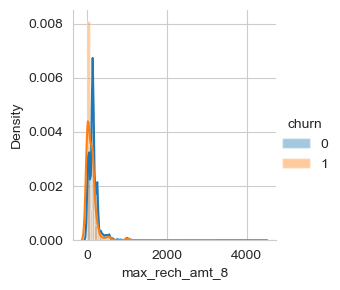

In [59]:
# Set style to whitegrid
sns.set_style('whitegrid')

# Create a bigger figure
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Create FacetGrid and distribution plot
grid = sns.FacetGrid(df, hue='churn')
grid.map(sns.distplot, "max_rech_amt_8").add_legend()

# Show the plot
plt.show()

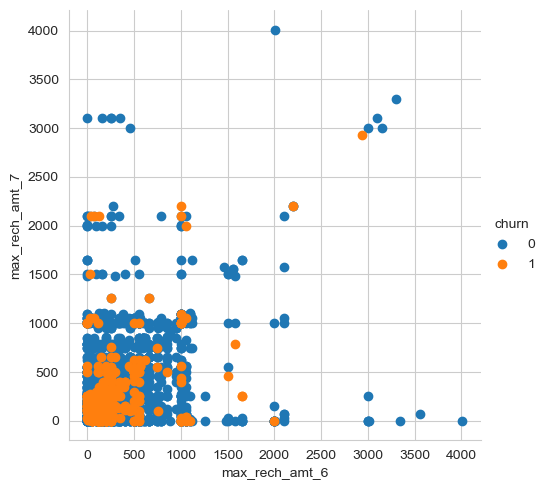

In [60]:
sns.FacetGrid(df, hue='churn', height=5).map(plt.scatter, "max_rech_amt_6", "max_rech_amt_7").add_legend()


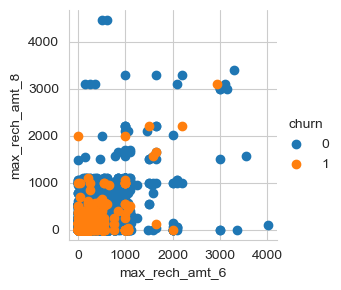

In [61]:
sns.FacetGrid(df,hue='churn').map(plt.scatter,"max_rech_amt_6","max_rech_amt_8").add_legend()

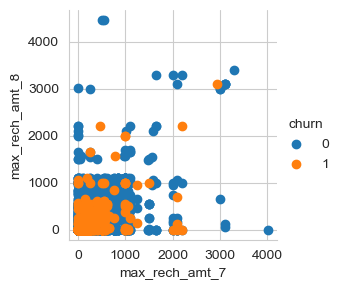

In [62]:
sns.FacetGrid(df,hue='churn').map(plt.scatter,"max_rech_amt_7","max_rech_amt_8").add_legend()

* we can show all univariate and bivariate analysis of this file in similar way.

#### Analysis with Correlation Matrix: 

<Axes: >

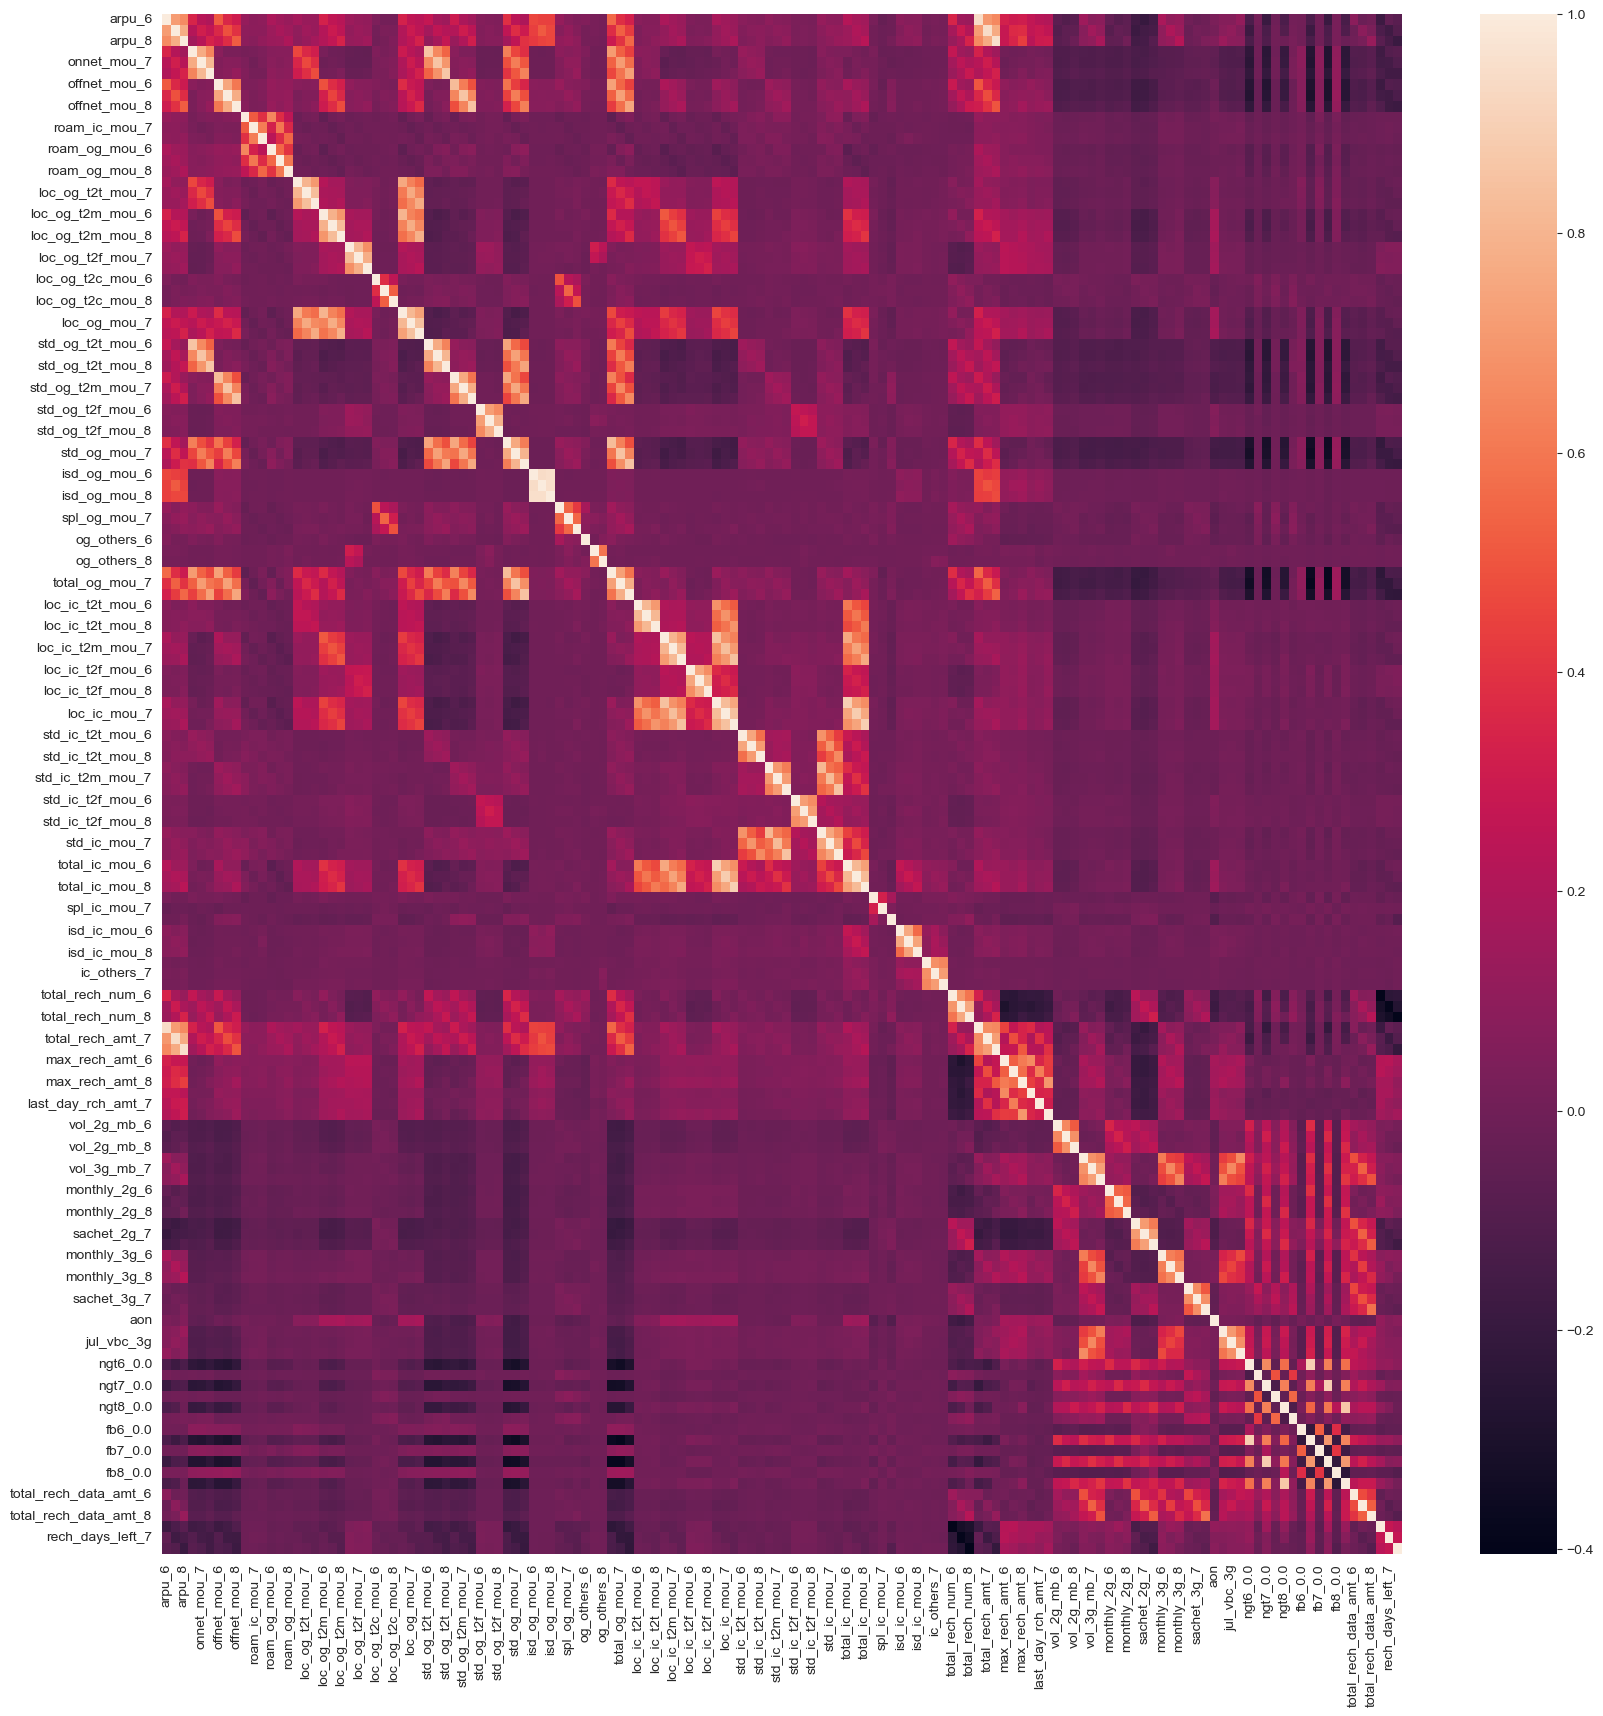

In [63]:
df2 = df.drop(['mobile_number', 'churn'], axis=1)

# Let's see the correlation matrix 
plt.figure(figsize = (20,20))       
sns.heatmap(df2.corr())

In [64]:
# Correlation matrix
corr_matrix = df2.corr().abs()

# Upper triangle of correlation matrix
upper = corr_matrix.mask(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))



# Index of feature columns with correlation greater than 0.80
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.80)]

print("HIGHLY CORRELATED FEATURES IN DATA SET:{}\n\n{}".format(len(high_corr_features), high_corr_features))

HIGHLY CORRELATED FEATURES IN DATA SET:142

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',

* highly correlated features (> 80%) found in the data set.
* But We are not dropping these columns manually rather using feature reduction methods to do the job. We worked with RFE, LASSO and PCA.

#### FEATURE REDUCTION USING RFE & LOGISTIC REGRESSION

In [164]:
# We shall work with 'tel_com', copy of df:
tel_com.head(5)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,ngt6_0.0,ngt6_1.0,ngt7_0.0,ngt7_1.0,ngt8_0.0,ngt8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn,rech_days_left_6,rech_days_left_7,rech_days_left_8
7,7000701601,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,False,False,False,False,False,False,False,False,False,False,False,False,0.00,0.00,0.00,1,3.00,6.00,5.00
8,7001524846,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,False,False,True,False,True,False,False,False,False,True,False,True,0.00,354.00,207.00,0,5.00,0.00,1.00
21,7002124215,514.45,597.75,637.76,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.00,0.00,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,763.29,934.69,938.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101

In [165]:
tel_com.shape

(28504, 144)

In [67]:
# let us drop Phone-number:
tel_dt = tel_com.drop(['mobile_number'], axis=1)

# Create X (independent variable) & y (dependent variable) 
df_tel = tel_dt.drop(['churn'], axis=1)
X = tel_dt.drop(['churn'], axis=1)
y = tel_dt['churn']

In [68]:
X.shape

(28504, 142)

##### Data Standardization

In [69]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
Xscaled = scaler.transform(X)

##### train test splitting:

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size=0.3, train_size=0.7, random_state=1)

In [71]:
print ('shape: train data shape ',X_train.shape,'test data shape ',X_test.shape,)

shape: train data shape  (19952, 142) test data shape  (8552, 142)


In [72]:
train_imb = (y_train != 0).sum()/(y_train == 0).sum()
test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data: ",train_imb)
print("Imbalance in Test Data: ",test_imb)

Imbalance in Train Data:  0.05941698083151914
Imbalance in Test Data:  0.059071207430340555


##### Balanceing data set by oversampling

In [73]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE object
sm = SMOTE(random_state=0)

# Use fit_resample method
X_tr, y_tr = sm.fit_resample(X_train, y_train)


In [166]:
# Printing the shapes of the training and test data arrays
print('Shape: train data shape', X_tr.shape, 'test data shape', y_tr.shape)

# Calculating the data imbalance ratio
data_imbalance = (y_tr != 0).sum() / (y_tr == 0).sum()

# Printing the data imbalance ratio
print("Imbalance in Train Data: {:.2f}".format(data_imbalance))


Shape: train data shape (37666, 142) test data shape (37666,)
Imbalance in Train Data: 1.00


In [75]:
X_trr=X_tr.copy()
y_trr=y_tr.copy()
X_testr=X_test.copy()
y_testr=y_test.copy()

### Feature reduction using RFE

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Initializing Logistic Regression model
logreg = LogisticRegression()

# Initializing RFE (Recursive Feature Elimination) with Logistic Regression as estimator
rfe = RFE(estimator=logreg, n_features_to_select=20)

# Fitting RFE to the training data
rfe.fit(X_trr, y_trr)


RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [169]:
# Extracting the names of the selected features
rfe_features = list(df_tel.columns[rfe.support_])
print(rfe_features)


['arpu_8', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_8', 'std_og_t2m_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aon', 'rech_days_left_8']


In [170]:
len(rfe_features)

20

In [171]:
# Creating new feature sets based on the selected features from RFE
X_rfe = pd.DataFrame(data=X_trr).iloc[:, rfe.support_]
y_rfe = y_trr


### Logistic Regression Model

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Instantiate and fit the logistic regression model
classifier = LogisticRegression(random_state=1)
classifier.fit(X_rfe, y_rfe)


LogisticRegression(random_state=1)

In [81]:
X_test_rfe = pd.DataFrame(data=X_testr).iloc[:, rfe.support_]

y_predr = classifier.predict(X_test_rfe)

# confusion_matrix and its plot
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_testr, y_predr)
cn = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]
print(con_mat ,'\n','\n','normalized','\n','\n',cn)
print("\n","LogisticRegression accuracy score: ",accuracy_score(y_testr,y_predr))

[[6551 1524]
 [  90  387]] 
 
 normalized 
 
 [[0.81126935 0.18873065]
 [0.18867925 0.81132075]]

 LogisticRegression accuracy score:  0.8112722170252572


Observation:
- The confusion matrix shows the following counts:
- True Negative (TN): 6551
- False Positive (FP): 1524
- False Negative (FN): 90
- True Positive (TP): 387

In normalized terms, the accuracy score is approximately 0.81, indicating that the logistic regression model correctly predicts the outcome in around 81% of cases.


<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

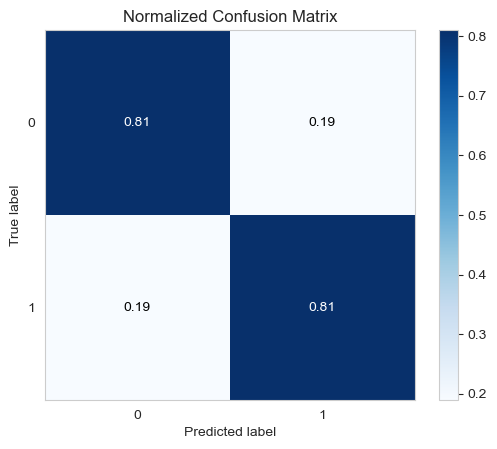

In [82]:
skmt.plot_confusion_matrix(y_testr,y_predr,normalize=True)

In [83]:
# Let's check the report of our  model
print(classification_report(y_testr, y_predr))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      8075
           1       0.20      0.81      0.32       477

    accuracy                           0.81      8552
   macro avg       0.59      0.81      0.61      8552
weighted avg       0.94      0.81      0.86      8552



* Here we see model gives almost 82.0% accuracy, but Confusion matix clearly shows it has drawback
in predicting churn as high false positives.

* Key features obtained from RFE : 
 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'og_others_8', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'spl_ic_mou_7', 'ic_others_7', 'last_day_rch_amt_8', 'monthly_2g_8', 'monthly_3g_8', 'aon', 'aug_vbc_3g', 'fb8_1.0', 'total_rech_data_amt_8', 'rech_days_left_8'

### * Let us try with PCA and logistic regression.

In [84]:
X_trp=X_tr.copy()
y_trp=y_tr.copy()
X_testp=X_test.copy()
y_testp=y_test.copy()

###  Applying PCA 

In [85]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

#Doing the PCA on the train data
pca.fit(X_trp)

PCA(random_state=100)

In [86]:
df_train_pca = pca.fit_transform(X_trp)
print(df_train_pca.shape)
df_test_pca = pca.transform(X_testp)
print(df_test_pca.shape)

(37666, 142)
(8552, 142)


In [87]:
# Let's run the model using the pca variables
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
logsk = LogisticRegression(C=1e9)
logsk.fit(df_train_pca, y_trp)

#  probability prediction
y_pred = logsk.predict(df_test_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)


In [88]:

cml=confusion_matrix(y_testp,y_pred)
cn = cml.astype('float') / cml.sum(axis=1)[:, np.newaxis]
print(cml, '\n','\n','normalized','\n','\n',cn)
print("\n","LogisticRegression accuracy score: ",accuracy_score(y_testp,y_pred))

[[6650 1425]
 [  91  386]] 
 
 normalized 
 
 [[0.82352941 0.17647059]
 [0.19077568 0.80922432]]

 LogisticRegression accuracy score:  0.8227315247895229


<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

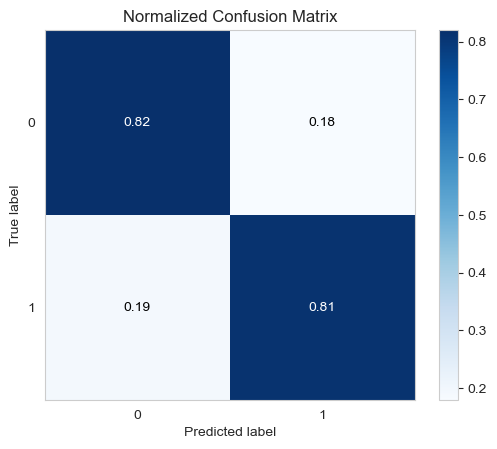

In [89]:
skmt.plot_confusion_matrix(y_testp,y_pred,cmap=plt.cm.Blues,normalize=True)

In [90]:
# Let's check the report of this  model
print(classification_report( y_testp,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      8075
           1       0.21      0.81      0.34       477

    accuracy                           0.82      8552
   macro avg       0.60      0.82      0.62      8552
weighted avg       0.94      0.82      0.87      8552



In [91]:
pca.components_

array([[ 1.44570276e-01,  1.48899058e-01,  1.01459553e-01, ...,
        -7.05426831e-02, -5.46346910e-02, -3.51668647e-02],
       [ 9.36977243e-02,  1.10256737e-01,  1.50621555e-01, ...,
         2.14646501e-02, -7.60556299e-03, -1.97020831e-02],
       [ 7.13444869e-02,  5.89495684e-02,  5.74751033e-02, ...,
         2.28531580e-02,  3.44438478e-02,  5.10871584e-03],
       ...,
       [ 4.50728603e-16, -8.54201872e-17, -1.06729421e-17, ...,
         8.76472900e-18, -1.95102384e-17, -2.42824887e-17],
       [ 3.54046939e-16, -2.02999115e-16, -7.06453394e-17, ...,
        -5.20505449e-17,  9.92469938e-20,  2.68754484e-17],
       [-0.00000000e+00, -2.78731650e-17,  1.02592544e-16, ...,
         2.72560714e-17,  2.62336429e-18, -2.45030278e-17]])

In [92]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':colnames})
pcs_df.head(10)

,PC1,PC2,PC3,Feature
0,0.14,0.09,0.07,arpu_6
1,0.15,0.11,0.06,arpu_7
2,0.10,0.15,0.06,arpu_8
3,0.17,-0.05,-0.06,onnet_mou_6
4,0.18,-0.03,-0.07,onnet_mou_7
5,0.12,0.02,-0.05,onnet_mou_8
6,0.18,0.04,0.02,offnet_mou_6
7,0.19,0.05,0.01,offnet_mou_7
8,0.12,0.09,0.01,offnet_mou_8
9,0.02,0.01,0.34,roam_ic_mou_6


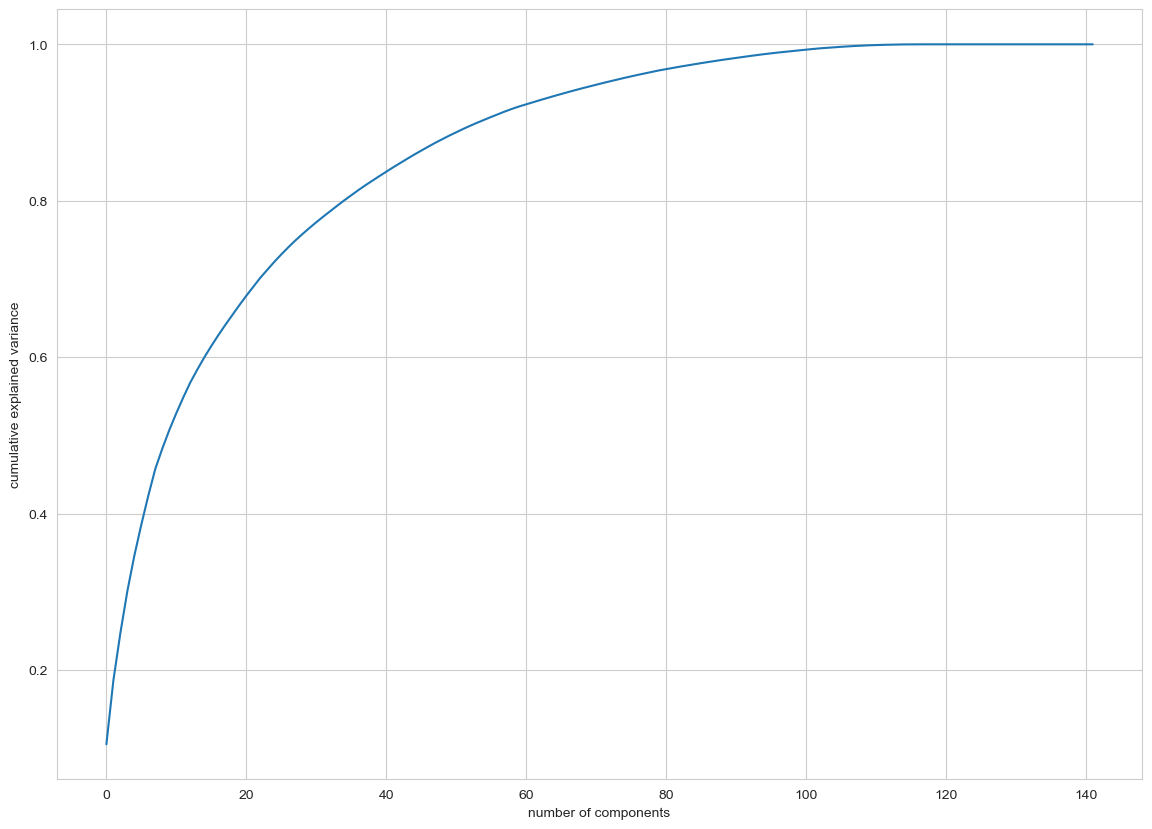

In [93]:
#Making the screeplot - plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (14,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [94]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([10.5 , 18.65, 24.72, 30.08, 34.62, 38.6 , 42.31, 45.73, 48.31,
       50.69, 52.84, 54.86, 56.76, 58.4 , 59.96, 61.41, 62.79, 64.1 ,
       65.37, 66.62, 67.83, 68.99, 70.13, 71.15, 72.16, 73.11, 74.02,
       74.88, 75.69, 76.47, 77.22, 77.94, 78.64, 79.34, 80.02, 80.68,
       81.32, 81.94, 82.53, 83.11, 83.68, 84.25, 84.8 , 85.34, 85.87,
       86.38, 86.88, 87.37, 87.83, 88.29, 88.73, 89.15, 89.56, 89.95,
       90.32, 90.69, 91.05, 91.4 , 91.73, 92.03, 92.3 , 92.57, 92.84,
       93.1 , 93.36, 93.61, 93.86, 94.1 , 94.34, 94.57, 94.8 , 95.02,
       95.24, 95.46, 95.67, 95.87, 96.07, 96.26, 96.45, 96.63, 96.79,
       96.95, 97.11, 97.26, 97.41, 97.56, 97.7 , 97.84, 97.98, 98.11,
       98.24, 98.37, 98.49, 98.61, 98.72, 98.83, 98.93, 99.02, 99.11,
       99.2 , 99.29, 99.38, 99.46, 99.53, 99.59, 99.65, 99.71, 99.76,
       99.81, 99.85, 99.88, 99.91, 99.93, 99.95, 99.96, 99.97, 99.97,
       99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97,
       99.97, 99.97,

In [95]:
# 90% explained variance is almost with 50, Appling logistic regression with 50 columns 
pca_r = PCA(n_components=50)

In [96]:
df_train_pca_r = pca_r.fit_transform(X_trp)
print(df_train_pca_r.shape)
df_test_pca_r = pca_r.transform(X_testp)
print(df_test_pca_r.shape)

(37666, 50)
(8552, 50)


In [97]:
# Let's run the model using the selected 50 variables

logsk1 = LogisticRegression(C=1e9)
logsk1.fit(df_train_pca_r, y_trp)

# Predicted probabilities
y_pred_r = logsk1.predict(df_test_pca_r)
# Converting y_pred to a dataframe which is an array
y_pred_default = pd.DataFrame(y_pred_r)

In [98]:
# confusion matrix
cmpl=confusion_matrix(y_testp,y_pred_r)
cn = cmpl.astype('float') / cmpl.sum(axis=1)[:, np.newaxis]
print(cmpl, '\n','\n','normalized','\n','\n',cn)
print("\n","Accuracy score with 50 compontnts: ",accuracy_score(y_testp,y_pred_r))

[[6638 1437]
 [  92  385]] 
 
 normalized 
 
 [[0.82204334 0.17795666]
 [0.19287212 0.80712788]]

 Accuracy score with 50 compontnts:  0.8212114125350796


<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

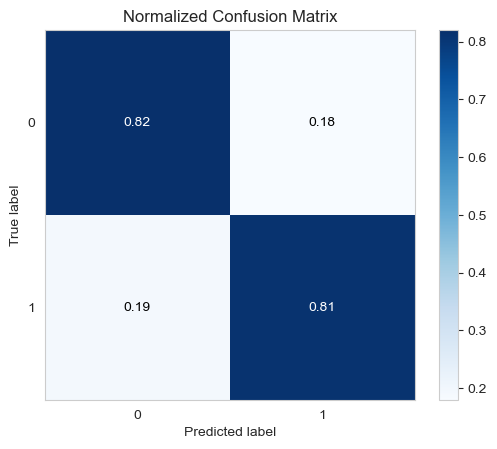

In [99]:

skmt.plot_confusion_matrix(y_testp,y_pred_r,cmap=plt.cm.Blues,normalize=True)

In [100]:
y_pred_default .head(6)

,0
0,0
1,1
2,0
3,0
4,0
5,1


In [101]:
# Let's check the report of this  model
print(classification_report(y_testp,y_pred_r))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      8075
           1       0.21      0.81      0.33       477

    accuracy                           0.82      8552
   macro avg       0.60      0.81      0.62      8552
weighted avg       0.94      0.82      0.87      8552



###  LASSO with  DECISSION TREE & RANDOM FOREST 

In [102]:
X_trl=X_tr.copy()
y_trl=y_tr.copy()
X_testl=X_test.copy()
y_testl=y_test.copy()

In [103]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_trl, y_trl)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_trl)
pos = model.get_support(indices=True)
 ### Feature reduction using RFE
print(X_lasso.shape)
print(pos)

(37666, 47)
[  0   1   3  10  13  14  20  23  29  34  38  39  40  47  49  52  53  58
  65  78  79  80  83  91  92  98 101 102 104 107 108 109 110 111 113 116
 118 120 121 125 128 132 135 138 139 140 141]


In [104]:
#feature vector for decision tree#feature 
lasso_features = list(X.columns[pos])
print("Features identified by LASSO for model buidling: ", lasso_features)

Features identified by LASSO for model buidling:  ['arpu_6', 'arpu_7', 'onnet_mou_6', 'roam_ic_mou_7', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_t2m_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'spl_og_mou_8', 'og_others_7', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_6', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_7', 'aon', 'aug_vbc_3g', 'ngt6_1.0', 'ngt8_0.0', 'fb7_0.0', 'fb8_1.0', 'total_rech_data_amt_8', 'rech_days_left_6', 'rech_days_left_7', 'rech_days_left_8']


In [105]:
X_trainl = X_lasso
y_trainl = y_trl
print ("Feature space holds %d observations and %d features" % X_trainl.shape)
print ("Unique target labels:", np.unique(y_trainl))

Feature space holds 37666 observations and 47 features
Unique target labels: [0 1]


###  Decision Tree with default hyperparameter

In [106]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_trainl, y_trainl)

DecisionTreeClassifier(max_depth=5)

In [107]:
# Making predictions
X_testl = pd.DataFrame(data=X_testl).iloc[:, pos]
y_pred_default = dt_default.predict(X_testl)

# Printing classification report
print(classification_report(y_testl, y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      8075
           1       0.25      0.74      0.38       477

    accuracy                           0.86      8552
   macro avg       0.62      0.80      0.65      8552
weighted avg       0.94      0.86      0.89      8552



In [108]:
# Printing confusion matrix and accuracy
cmdt=confusion_matrix(y_testl,y_pred_default)
cn = cmdt.astype('float') / cmdt.sum(axis=1)[:, np.newaxis]
print(cmdt, '\n','\n','normalized','\n','\n',cn)

print("\n",'Accuracy score :  ', accuracy_score(y_testl,y_pred_default))

[[7037 1038]
 [ 125  352]] 
 
 normalized 
 
 [[0.87145511 0.12854489]
 [0.26205451 0.73794549]]

 Accuracy score :   0.8640084190832554


<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

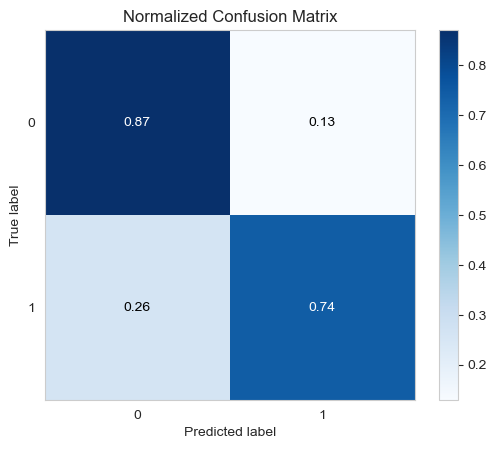

In [109]:
skmt.plot_confusion_matrix(y_testl,y_pred_default,cmap=plt.cm.Blues,normalize=True)

In [110]:
y_pred_df_dt = pd.DataFrame(y_pred_default)
y_pred_df_dt.head(6)

,0
0,0
1,1
2,0
3,0
4,0
5,1


### Random Forest with default hyperparameter


In [111]:
X_tr_rf = X_lasso
y_tr_rf = y_trl
X_test_rf=X_test.copy()
y_test_rf=y_test.copy()


In [112]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [113]:
# fit
rfc.fit(X_tr_rf, y_tr_rf)

RandomForestClassifier()

In [114]:
# Making predictions
X_test_rf = pd.DataFrame(data=X_test_rf).iloc[:, pos]
y_predictions_rf = rfc.predict(X_test_rf)

In [115]:
# Let's check the report of our  model
print(classification_report(y_test_rf,y_predictions_rf))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8075
           1       0.51      0.53      0.52       477

    accuracy                           0.95      8552
   macro avg       0.74      0.75      0.75      8552
weighted avg       0.95      0.95      0.95      8552



In [116]:
# Printing confusion matrix
cmrf=confusion_matrix(y_test_rf, y_predictions_rf)
cn = cmrf.astype('float') / cmrf.sum(axis=1)[:, np.newaxis]
print(cmrf, '\n','\n','normalized','\n','\n',cn)
print("\n",'Accuracy score :  ',accuracy_score(y_test_rf,y_predictions_rf))

[[7832  243]
 [ 224  253]] 
 
 normalized 
 
 [[0.96990712 0.03009288]
 [0.46960168 0.53039832]]

 Accuracy score :   0.9453928905519177


<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

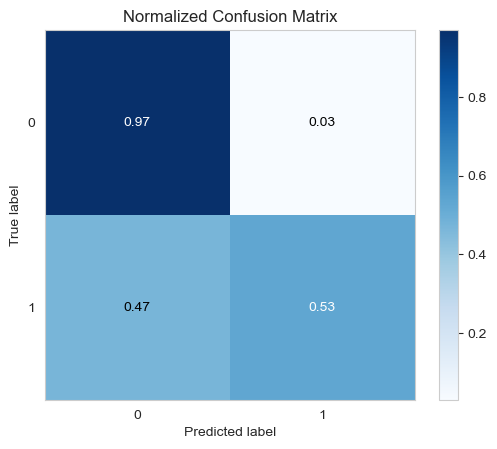

In [117]:
skmt.plot_confusion_matrix(y_test_rf,y_predictions_rf,cmap=plt.cm.Blues,normalize=True)


In [118]:
y_pred_df_rf = pd.DataFrame(y_predictions_rf)
y_pred_df_rf.head(6)

,0
0,0
1,1
2,0
3,0
4,0
5,1


### Discussions:

Above we worked with RFE, PCA and LASSO and got following results:
1.	Using RFE we got accuracy around 81%, f1 score 0.32 ( churn ) and 0.89( non-churn ).
2.	 Using all PCA variables, accuracy was seen 82.3%, f1 score 0.34(churn), 0.90(non-churn). Usingh selected 50 variables (90% explained variance) we got almost same accuracy and f1 score. 
3.	LASSO with 

     a.	DECISSION TREE:  we got accuracy around 86%, f1 score 0.38(churn) and 0.92(non-churn)

     b.	 RANDOM FOREST:  accuracy around 94%, f1 score 0.53(churn) and 0.97(non-churn) were found.

So Lasso with Random Forest shows much better result and this model is most acceptable among above mentioned trials.


** PCA without "Balanceing data set by oversampling" was done but that shows  results:
accuracy 82.3%, f1 score 0.22(churn), 0.97(non-churn). Using selected 50 variables (90% explained variance) we got accuracy 61%, f1 score 0.15(churn), 0.74(non-churn) . This result is more poor and that  portion of programme is not shown in this notebook.